# Baseline CNN

Before working on the MIL, I'd like to produce a CNN which can train decently well on our three datasets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers
import utils

N_CLASSES = 10

utils.gpu_fix()

tf.random.set_seed(42)
print(tf.__version__)

1 Physical GPUs, 1 Logical GPUs
2.4.1


Define the model.

In [2]:
def define_model(shape=(28, 28, 1)):
  model = utils.baseline_model(shape, N_CLASSES)
  utils.compile(model, N_CLASSES)
  return model

print(define_model(shape=(32, 32, 3)).summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

----- Data -----
Train : x=(50000, 32, 32, 3), y=(50000, 10)
Test  : x=(10000, 32, 32, 3), y=(10000, 10)
Splits: train=[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000], test=[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
----------------
Epoch 1/10
782/782 [==============================] - 27s 28ms/step - loss: 1.8067 - precision: 0.5902 - recall: 0.0964 - auc: 0.7852 - f1: 0.3311 - tp: 3251.8416 - tn: 224044.5390 - fp: 1745.6220 - fn: 21835.9540 - val_loss: 1.2471 - val_precision: 0.7786 - val_recall: 0.3081 - val_auc: 0.9149 - val_f1: 0.5572 - val_tp: 3081.0000 - val_tn: 89124.0000 - val_fp: 876.0000 - val_fn: 6919.0000
Epoch 2/10
782/782 [==============================] - 19s 25ms/step - loss: 1.3041 - precision: 0.7196 - recall: 0.3289 - auc: 0.9032 - f1: 0.5321 - tp: 8414.5019 - tn: 222514.4866 - fp: 3275.6743 - fn: 16673.2937 - val_loss: 1.1105 - val_precision: 0.7757 - val_recall: 0.4234 - val_auc: 0.9310 - val_f1: 0.5957 - val_tp: 4234.0000 - val_tn: 88776.0000 - val_f

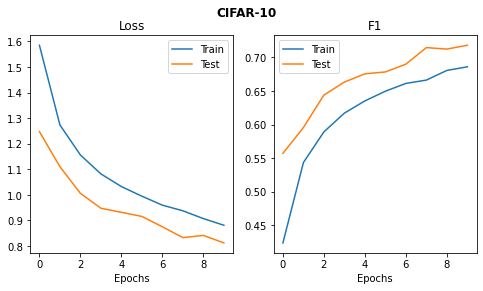

In [3]:
history = utils.evaluate(define_model(shape=(32, 32, 3)), utils.load_cifar10)
utils.plot_history(history, title='CIFAR-10')

----- Data -----
Train : x=(60000, 28, 28, 1), y=(60000, 10)
Test  : x=(10000, 28, 28, 1), y=(10000, 10)
Splits: train=[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000], test=[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
----------------
Epoch 1/10
938/938 [==============================] - 23s 23ms/step - loss: 0.7741 - precision: 0.8248 - recall: 0.6214 - auc: 0.9595 - f1: 0.7135 - tp: 20732.8009 - tn: 267115.6709 - fp: 3603.1022 - fn: 9347.0628 - val_loss: 0.3658 - val_precision: 0.9019 - val_recall: 0.8300 - val_auc: 0.9918 - val_f1: 0.8650 - val_tp: 8300.0000 - val_tn: 89097.0000 - val_fp: 903.0000 - val_fn: 1700.0000
Epoch 2/10
938/938 [==============================] - 20s 22ms/step - loss: 0.3786 - precision: 0.8945 - recall: 0.8321 - auc: 0.9907 - f1: 0.8606 - tp: 25067.0522 - tn: 267745.0937 - fp: 2973.6794 - fn: 5012.8115 - val_loss: 0.3319 - val_precision: 0.9019 - val_recall: 0.8504 - val_auc: 0.9929 - val_f1: 0.8721 - val_tp: 8504.0000 - val_tn: 89075.0000 - val_f

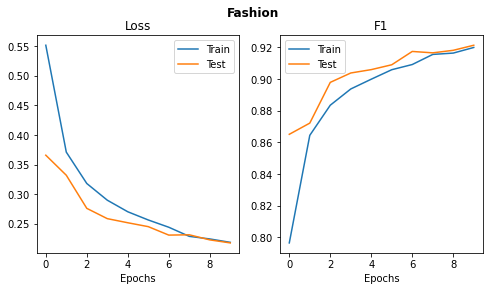

In [4]:
history = utils.evaluate(define_model(), utils.load_fashion)
utils.plot_history(history, title='Fashion')

----- Data -----
Train : x=(60000, 28, 28, 1), y=(60000, 10)
Test  : x=(10000, 28, 28, 1), y=(10000, 10)
Splits: train=[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949], test=[ 980 1135 1032 1010  982  892  958 1028  974 1009]
----------------
Epoch 1/10
938/938 [==============================] - 24s 24ms/step - loss: 0.4940 - precision: 0.9145 - recall: 0.7791 - auc: 0.9753 - f1: 0.8381 - tp: 25877.4430 - tn: 269194.3589 - fp: 1524.4143 - fn: 4202.4207 - val_loss: 0.0529 - val_precision: 0.9852 - val_recall: 0.9804 - val_auc: 0.9996 - val_f1: 0.9822 - val_tp: 9804.0000 - val_tn: 89853.0000 - val_fp: 147.0000 - val_fn: 196.0000
Epoch 2/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0875 - precision: 0.9758 - recall: 0.9688 - auc: 0.9988 - f1: 0.9719 - tp: 29161.5708 - tn: 270014.7071 - fp: 704.0660 - fn: 918.2929 - val_loss: 0.0346 - val_precision: 0.9898 - val_recall: 0.9869 - val_auc: 0.9998 - val_f1: 0.9882 - val_tp: 9869.0000 - val_tn: 89898.0000 - val_fp: 

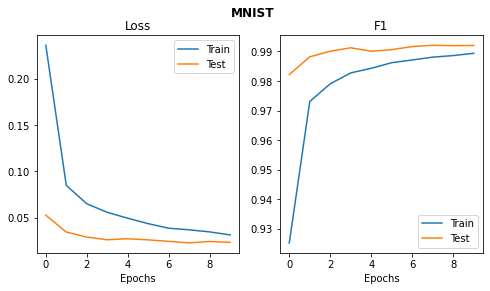

In [5]:
history = utils.evaluate(define_model(), utils.load_mnist)
utils.plot_history(history, title='MNIST')